In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the data

data = pd.read_csv('dataset-grid-toplology-1.csv',sep="\t", on_bad_lines='skip')
data.head()

,No,Time,From,To,sourceaddress,destinationaddress,edgenodeaddress,INSTANCE_ID,rank,rank_min,...,hops,distance,node_type,node_honest_level,energy_efficiency_OF,lattency_min_OF,pdr_OF,congestion_OF,throughput_opt_OF,Data
0,2,00:03.044,1,[25 d],fe80::212:74011101,fe80::212:74033303,fe80::212:74011101,87bb925b-d3ff-46a6-b339-7d48b8993bec,1024.0,256,...,2,-12,EDGE_NODE,793,-0.000479,-1737107271769,0.01,0.25,0.044803,97: 0x41D88ACD ABFFFF01 01010001 7412007A 3B3A...
1,3,00:03.993,20,[20 d],fe80::212:7420202020,fe80::212:74044404,fe80::212:74000101,bd86a2f6-b3d6-4c67-a9d3-2a42904c243c,NaN,256,...,2,128,CHILD_NODE,788,-0.000417,-1737107271609,0.01,0.25,0.043178,102: 0x61DC18CD AB020202 00027412 00141414 001...
2,4,00:03.993,24,0,fe80::212:7424242424,0,0,0233072f-b8cd-4189-818e-2a4e2b8f1ae7,65535.0,256,...,1,256,CHILD_NODE,768,-0.000416,0,NaN,0.00,0.065104,102: 0x61DC18CD AB020202 00027412 00181818 001...
3,5,00:03.997,42,[10 d],fe80::212:7442424242,fe80::212:74044404,fe80::212:74000101,c0a88d50-730f-4c1a-b21e-83c23f59d9b0,NaN,256,...,1,128,CHILD_NODE,778,-0.000417,-1737107271609,0.01,0.25,0.041876,102: 0x61DC18CD AB020202 00027412 002A2A2A 002...
4,6,00:03.997,19,0,fe80::212:7419191919,0,0,3c256cd4-9b1b-43e3-ab9d-a61f12a776ce,65535.0,256,...,1,256,CHILD_NODE,768,-0.000417,0,NaN,0.00,0.065104,102: 0x61DC18CD AB020202 00027412 00131313 001...


In [4]:
# Profile of Data - No. of Rows,Columns,Data Type,Data Byte,Null Values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33889 entries, 0 to 33888
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   No                    33889 non-null  object 
 1   Time                  33889 non-null  object 
 2   From                  33889 non-null  int64  
 3   To                    33889 non-null  object 
 4   sourceaddress         33889 non-null  object 
 5   destinationaddress    33889 non-null  object 
 6   edgenodeaddress       33889 non-null  object 
 7   INSTANCE_ID           33889 non-null  object 
 8   rank                  32541 non-null  float64
 9   rank_min              33889 non-null  int64  
 10  rank_max              33889 non-null  int64  
 11  node_id               33889 non-null  int64  
 12  ver                   33889 non-null  int64  
 13  ver_min               33889 non-null  int64  
 14  ver_max               33889 non-null  int64  
 15  ver_diff           

In [5]:
#Changing the column name to lower

data.columns = data.columns.str.lower()

In [6]:
data.columns

Index(['no', 'time', 'from', 'to', 'sourceaddress', 'destinationaddress',
       'edgenodeaddress', 'instance_id', 'rank', 'rank_min', 'rank_max',
       'node_id', 'ver', 'ver_min', 'ver_max', 'ver_diff', 'sending_time',
       'sending_rate', 'delta_time', 'received_packets', 'forward_packets',
       'drop_count', 'energy_consumption', 'etx', 'hops', 'distance',
       'node_type', 'node_honest_level', 'energy_efficiency_of',
       'lattency_min_of', 'pdr_of', 'congestion_of', 'throughput_opt_of',
       'data'],
      dtype='object')

In [7]:
# Null Values

data.isna().sum().sort_values(ascending = False)

sending_time            33889
pdr_of                   7042
rank                     1348
no                          0
time                        0
sourceaddress               0
destinationaddress          0
edgenodeaddress             0
instance_id                 0
from                        0
rank_min                    0
rank_max                    0
ver                         0
node_id                     0
ver_min                     0
ver_max                     0
ver_diff                    0
to                          0
sending_rate                0
delta_time                  0
forward_packets             0
received_packets            0
energy_consumption          0
etx                         0
hops                        0
drop_count                  0
distance                    0
node_type                   0
energy_efficiency_of        0
node_honest_level           0
lattency_min_of             0
congestion_of               0
throughput_opt_of           0
data      

In [8]:
#Null Features

na_features = [feature for feature in data.columns if data[feature].isnull().sum()>1]
for features in na_features:
    print(f"{features}:{data[features].isnull().mean()*100: .3f}% missing value")

rank: 3.978% missing value
sending_time: 100.000% missing value
pdr_of: 20.780% missing value


In [9]:
# Handling the null values

data.drop(['sending_time'],axis = 1,inplace = True)
data['rank'] = data['rank'].fillna(data['rank'].mode()[0])
data['pdr_of'] = data['pdr_of'].fillna(data['pdr_of'].mode()[0])
data.dropna()

,no,time,from,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,rank,rank_min,...,hops,distance,node_type,node_honest_level,energy_efficiency_of,lattency_min_of,pdr_of,congestion_of,throughput_opt_of,data
0,2,00:03.044,1,[25 d],fe80::212:74011101,fe80::212:74033303,fe80::212:74011101,87bb925b-d3ff-46a6-b339-7d48b8993bec,1024.0,256,...,2,-12,EDGE_NODE,793,-0.000479,-1737107271769,0.01,0.25,0.044803,97: 0x41D88ACD ABFFFF01 01010001 7412007A 3B3A...
1,3,00:03.993,20,[20 d],fe80::212:7420202020,fe80::212:74044404,fe80::212:74000101,bd86a2f6-b3d6-4c67-a9d3-2a42904c243c,1280.0,256,...,2,128,CHILD_NODE,788,-0.000417,-1737107271609,0.01,0.25,0.043178,102: 0x61DC18CD AB020202 00027412 00141414 001...
2,4,00:03.993,24,0,fe80::212:7424242424,0,0,0233072f-b8cd-4189-818e-2a4e2b8f1ae7,65535.0,256,...,1,256,CHILD_NODE,768,-0.000416,0,0.01,0.00,0.065104,102: 0x61DC18CD AB020202 00027412 00181818 001...
3,5,00:03.997,42,[10 d],fe80::212:7442424242,fe80::212:74044404,fe80::212:74000101,c0a88d50-730f-4c1a-b21e-83c23f59d9b0,1280.0,256,...,1,128,CHILD_NODE,778,-0.000417,-1737107271609,0.01,0.25,0.041876,102: 0x61DC18CD AB020202 00027412 002A2A2A 002...
4,6,00:03.997,19,0,fe80::212:7419191919,0,0,3c256cd4-9b1b-43e3-ab9d-a61f12a776ce,65535.0,256,...,1,256,CHILD_NODE,768,-0.000417,0,0.01,0.00,0.065104,102: 0x61DC18CD AB020202 00027412 00131313 001...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33884,34708,03:35.857,35,[26 d],fe80::212:7435353535,fe80::212:74022202,fe80::212:74000101,6e2937c1-7d86-4d9a-9a82-cc52f4c413b4,1024.0,256,...,2,-12,CHILD_NODE,794,-0.000417,-1737107453418,0.01,0.25,0.040950,102: 0x61DCBECD AB1B1B1B 001B7412 00232323 002...
33885,34709,03:35.860,27,[31 d],fe80::212:7427272727,fe80::212:74022202,fe80::212:74000101,7043edd5-26c2-4b7e-a0d4-d29ea580265d,1280.0,256,...,3,-12,CHILD_NODE,799,0.001030,-1737107456511,0.01,0.25,0.041254,5: 0x0200BE4D E9
33886,34710,03:35.881,11,[25 d],fe80::212:7411111111,fe80::212:74022202,fe80::212:74000101,aff11b24-1cbb-408d-b3e6-bf8be7f987ba,1024.0,256,...,2,-12,CHILD_NODE,793,-0.000478,-1737107453575,0.01,0.25,0.043630,97: 0x41D8A6CD ABFFFF0B 0B0B000B 7412007A 3B3A...
33887,34711,03:35.890,33,[43 d],fe80::212:7433333333,fe80::212:74011101,fe80::212:74000101,80b84fa0-4fa8-462c-8a40-7927afe12312,1536.0,256,...,3,-12,CHILD_NODE,811,-0.000292,0,0.01,0.00,0.039494,117: 0x61DCD4CD AB161616 00167412 00212121 002...


In [10]:
data.isnull().sum().sum()

0

In [11]:
# Duplicated value

data[data.duplicated()]

,no,time,from,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,rank,rank_min,...,hops,distance,node_type,node_honest_level,energy_efficiency_of,lattency_min_of,pdr_of,congestion_of,throughput_opt_of,data


In [12]:
# The unique values in the data

print("Unique values per column")
data.nunique().sort_values(ascending = True)

Unique values per column


ver                         1
ver_min                     1
ver_diff                    1
ver_max                     1
rank_max                    1
rank_min                    1
pdr_of                      1
congestion_of               2
distance                    3
hops                        3
edgenodeaddress             3
node_type                   3
sending_rate                6
rank                        6
destinationaddress         39
drop_count                 44
node_honest_level          44
node_id                    52
from                       52
sourceaddress              52
to                         87
etx                        89
throughput_opt_of          89
energy_efficiency_of      161
energy_consumption        161
delta_time                445
forward_packets          2065
lattency_min_of          3245
received_packets         3292
data                     7006
time                    31601
no                      33889
instance_id             33889
dtype: int

In [13]:
# Checking the unique value in column

for i in data.columns:
    print(f"Unique value in {i}")
    print(data[i].unique() , '\n')

Unique value in no
['2' '3' '4' ... '34710' '34711' '34712'] 

Unique value in time
['00:03.044' '00:03.993' '00:03.997' ... '03:35.881' '03:35.890'
 '03:35.894'] 

Unique value in from
[ 1 20 24 42 19 21 28 32  4 17  9 41  6 12  3  2 34 33 46 29 51 15 37 14
 48 31 18 43 10 26 30 36 44 25  5 16  8 35 22 45 52 50 27 11 39 13 23 47
 40 38 49  7] 

Unique value in to
['[25 d]' '[20 d]' '0' '[10 d]' '[13 d]' '[3 d]' '[35 d]' '[19 d]' '[4 d]'
 '[43 d]' '[39 d]' '44' '[22 d]' '[17 d]' '[31 d]' '[23 d]' '[28 d]'
 '[27 d]' '[38 d]' '[24 d]' '[44 d]' '[8 d]' '[30 d]' '[26 d]' '[12 d]'
 '[21 d]' '[5 d]' '[11 d]' '[6 d]' '[33 d]' '[7 d]' '[34 d]' '[41 d]'
 '[36 d]' '[42 d]' '[14 d]' '24,32' '26,34' '[37 d]' '41' '38,40' '[29 d]'
 '[32 d]' '[18 d]' '1,31' '[9 d]' '2,30' '31' '1,34' '24,30' '[16 d]'
 '[15 d]' '31,51' '32' '22' '2' '26' '34' '13,26' '1' '7,22' '49' '24'
 '36' '13,34' '9,34' '40' '5,36' '17' '2,44' '40,48' '5' '30' '48' '20,41'
 '37' '31,34' '21' '14' '7' '9' '46' '1,51' '34,47' '41,

In [14]:
import re

def get_number(d):
    if isinstance(d, str):
        numbers = re.findall(r'\d+', d)
        return numbers[0] if numbers else '0'  
    return '0'

In [15]:
data['to'] = data['to'].apply(get_number)

In [16]:
data['to'].unique()

array(['25', '20', '0', '10', '13', '3', '35', '19', '4', '43', '39',
       '44', '22', '17', '31', '23', '28', '27', '38', '24', '8', '30',
       '26', '12', '21', '5', '11', '6', '33', '7', '34', '41', '36',
       '42', '14', '37', '29', '32', '18', '1', '9', '2', '16', '15',
       '49', '40', '48', '46'], dtype=object)

In [17]:
data.loc[data['sending_rate'] == 0]

,no,time,from,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,rank,rank_min,...,hops,distance,node_type,node_honest_level,energy_efficiency_of,lattency_min_of,pdr_of,congestion_of,throughput_opt_of,data
4892,5086,01:01.349,27,31,fe80::212:7427272727,fe80::212:74022202,fe80::212:74000101,26480cd7-3eba-4c7e-9b36-2b759517d481,1280.0,256,...,3,-12,CHILD_NODE,799,-0.000416,-1737107271957,0.01,0.25,0.041254,102: 0x61DC36CD AB0A0A0A 000A7412 001B1B1B 001...
19971,20509,02:20.487,42,0,fe80::212:7442424242,0,0,987072e7-e089-4976-82a6-4623419b497b,65535.0,256,...,1,256,CHILD_NODE,768,-0.000540,0,0.01,0.00,0.065104,93: 0x61DC8DCD AB0A0A0A 000A7412 002A2A2A 002A...
23535,24101,02:34.434,43,42,fe80::212:7443434343,fe80::212:74022202,fe80::212:74000101,297296ec-7154-4c27-b21a-bd2f3962e3e2,1536.0,256,...,3,-12,CHILD_NODE,810,-0.000417,-1737107451972,0.01,0.25,0.038670,102: 0x61DC95CD AB080808 00087412 002B2B2B 002...


In [18]:
data['sending_rate'].value_counts()

sending_rate
5    25661
6     7190
4      690
2      197
3      148
0        3
Name: count, dtype: int64

In [19]:
mode_value = data['sending_rate'].mode()[0]

def replace_zero(x):
    if x == 0:
        return mode_value
    return x

data['sending_rate'] = data['sending_rate'].apply(replace_zero)

In [20]:
data['sending_rate'].value_counts()

sending_rate
5    25664
6     7190
4      690
2      197
3      148
Name: count, dtype: int64

In [21]:
data.dtypes

no                       object
time                     object
from                      int64
to                       object
sourceaddress            object
destinationaddress       object
edgenodeaddress          object
instance_id              object
rank                    float64
rank_min                  int64
rank_max                  int64
node_id                   int64
ver                       int64
ver_min                   int64
ver_max                   int64
ver_diff                  int64
sending_rate              int64
delta_time                int64
received_packets          int64
forward_packets           int64
drop_count                int64
energy_consumption        int64
etx                       int64
hops                      int64
distance                  int64
node_type                object
node_honest_level         int64
energy_efficiency_of    float64
lattency_min_of           int64
pdr_of                  float64
congestion_of           float64
throughp

In [22]:
#Numerical Features

numerical_feature = [feature for feature in data.columns if data[feature].dtype != 'O']
print("No. of Numerical Column: ",len(numerical_feature))
data[numerical_feature].head()

No. of Numerical Column:  24


,from,rank,rank_min,rank_max,node_id,ver,ver_min,ver_max,ver_diff,sending_rate,...,energy_consumption,etx,hops,distance,node_honest_level,energy_efficiency_of,lattency_min_of,pdr_of,congestion_of,throughput_opt_of
0,1,1024.0,256,2048,1,240,0,240,240,2,...,3088,372,2,-12,793,-0.000479,-1737107271769,0.01,0.25,0.044803
1,20,1280.0,256,2048,20,240,0,240,240,2,...,3400,386,2,128,788,-0.000417,-1737107271609,0.01,0.25,0.043178
2,24,65535.0,256,2048,24,240,0,240,240,2,...,3401,256,1,256,768,-0.000416,0,0.01,0.00,0.065104
3,42,1280.0,256,2048,42,240,0,240,240,2,...,3400,398,1,128,778,-0.000417,-1737107271609,0.01,0.25,0.041876
4,19,65535.0,256,2048,19,240,0,240,240,2,...,3400,256,1,256,768,-0.000417,0,0.01,0.00,0.065104


In [23]:
# Categorical Columns

categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O']
print("No. of Categorical Column: ",len(categorical_feature))
data[categorical_feature].head()

No. of Categorical Column:  9


,no,time,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,node_type,data
0,2,00:03.044,25,fe80::212:74011101,fe80::212:74033303,fe80::212:74011101,87bb925b-d3ff-46a6-b339-7d48b8993bec,EDGE_NODE,97: 0x41D88ACD ABFFFF01 01010001 7412007A 3B3A...
1,3,00:03.993,20,fe80::212:7420202020,fe80::212:74044404,fe80::212:74000101,bd86a2f6-b3d6-4c67-a9d3-2a42904c243c,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00141414 001...
2,4,00:03.993,0,fe80::212:7424242424,0,0,0233072f-b8cd-4189-818e-2a4e2b8f1ae7,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00181818 001...
3,5,00:03.997,10,fe80::212:7442424242,fe80::212:74044404,fe80::212:74000101,c0a88d50-730f-4c1a-b21e-83c23f59d9b0,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 002A2A2A 002...
4,6,00:03.997,0,fe80::212:7419191919,0,0,3c256cd4-9b1b-43e3-ab9d-a61f12a776ce,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00131313 001...


In [24]:
#Statistical Analysis - Mean,Median,Mode,Min and Max

print("Numerical Statistical Analysis")
print(data[numerical_feature].describe().T)
print("=" * 90)
print("Categorical Statistical Analysis")
print(data[categorical_feature].describe().T)

Numerical Statistical Analysis
                        count          mean           std           min  \
from                  33889.0  2.506689e+01  1.533382e+01  1.000000e+00   
rank                  33889.0  1.316538e+04  2.510750e+04  5.120000e+02   
rank_min              33889.0  2.560000e+02  0.000000e+00  2.560000e+02   
rank_max              33889.0  2.048000e+03  0.000000e+00  2.048000e+03   
node_id               33889.0  2.506689e+01  1.533382e+01  1.000000e+00   
ver                   33889.0  2.400000e+02  0.000000e+00  2.400000e+02   
ver_min               33889.0  0.000000e+00  0.000000e+00  0.000000e+00   
ver_max               33889.0  2.400000e+02  0.000000e+00  2.400000e+02   
ver_diff              33889.0  2.400000e+02  0.000000e+00  2.400000e+02   
sending_rate          33889.0  5.165629e+00  5.242954e-01  2.000000e+00   
delta_time            33889.0  2.166769e+07  7.549893e+04  2.156792e+07   
received_packets      33889.0  5.126548e+02  8.762151e+02  0.000000e+

In [25]:
# Discrete Features
discrete_feature = [feature for feature in data[numerical_feature] if data[numerical_feature][feature].nunique() < 100]
print("Discrete Variables Count:", len(discrete_feature))

print(data[discrete_feature].head())

Discrete Variables Count: 18
   from     rank  rank_min  rank_max  node_id  ver  ver_min  ver_max  \
0     1   1024.0       256      2048        1  240        0      240   
1    20   1280.0       256      2048       20  240        0      240   
2    24  65535.0       256      2048       24  240        0      240   
3    42   1280.0       256      2048       42  240        0      240   
4    19  65535.0       256      2048       19  240        0      240   

   ver_diff  sending_rate  drop_count  etx  hops  distance  node_honest_level  \
0       240             2          25  372     2       -12                793   
1       240             2          20  386     2       128                788   
2       240             2           0  256     1       256                768   
3       240             2          10  398     1       128                778   
4       240             2           0  256     1       256                768   

   pdr_of  congestion_of  throughput_opt_of  
0    

In [26]:
# Continous Features
continous_feature = [feature for feature in data[numerical_feature] if data[numerical_feature][feature].nunique() > 100]
print("Continous Variables Count:", len(continous_feature))

print(data[continous_feature].head())

Continous Variables Count: 6
   delta_time  received_packets  forward_packets  energy_consumption  \
0    21567917              3395             3420                3088   
1    21567917              3440             3460                3400   
2    21567917                 0                0                3401   
3    21567917                10               20                3400   
4    21567917                 0                0                3400   

   energy_efficiency_of  lattency_min_of  
0             -0.000479   -1737107271769  
1             -0.000417   -1737107271609  
2             -0.000416                0  
3             -0.000417   -1737107271609  
4             -0.000417                0  


In [27]:
# Covariance

cov_matrix = data[numerical_feature].cov().round(4)
print(cov_matrix)

                              from          rank  rank_min  rank_max  \
from                  2.351260e+02 -9.932541e+03       0.0       0.0   
rank                 -9.932541e+03  6.303867e+08       0.0       0.0   
rank_min              0.000000e+00  0.000000e+00       0.0       0.0   
rank_max              0.000000e+00  0.000000e+00       0.0       0.0   
node_id               2.351260e+02 -9.932541e+03       0.0       0.0   
ver                   0.000000e+00  0.000000e+00       0.0       0.0   
ver_min               0.000000e+00  0.000000e+00       0.0       0.0   
ver_max               0.000000e+00  0.000000e+00       0.0       0.0   
ver_diff              0.000000e+00  0.000000e+00       0.0       0.0   
sending_rate         -1.666000e-01 -3.890059e+02       0.0       0.0   
delta_time            6.603329e+04  9.102834e+07       0.0       0.0   
received_packets     -2.758187e+02 -6.149214e+06       0.0       0.0   
forward_packets      -2.607672e+02 -6.425138e+06       0.0      

In [28]:
# Correlation

corr_matrix = data[numerical_feature].corr().round(4)
print(corr_matrix)

                        from    rank  rank_min  rank_max  node_id  ver  \
from                  1.0000 -0.0258       NaN       NaN   1.0000  NaN   
rank                 -0.0258  1.0000       NaN       NaN  -0.0258  NaN   
rank_min                 NaN     NaN       NaN       NaN      NaN  NaN   
rank_max                 NaN     NaN       NaN       NaN      NaN  NaN   
node_id               1.0000 -0.0258       NaN       NaN   1.0000  NaN   
ver                      NaN     NaN       NaN       NaN      NaN  NaN   
ver_min                  NaN     NaN       NaN       NaN      NaN  NaN   
ver_max                  NaN     NaN       NaN       NaN      NaN  NaN   
ver_diff                 NaN     NaN       NaN       NaN      NaN  NaN   
sending_rate         -0.0207 -0.0296       NaN       NaN  -0.0207  NaN   
delta_time            0.0570  0.0480       NaN       NaN   0.0570  NaN   
received_packets     -0.0205 -0.2795       NaN       NaN  -0.0205  NaN   
forward_packets      -0.0193 -0.2906  

In [29]:
data[numerical_feature].skew().round(4)

from                    0.0947
rank                    1.6062
rank_min                0.0000
rank_max                0.0000
node_id                 0.0947
ver                     0.0000
ver_min                 0.0000
ver_max                 0.0000
ver_diff                0.0000
sending_rate           -0.9799
delta_time             -0.1433
received_packets        3.9400
forward_packets         3.8984
drop_count             -0.4646
energy_consumption     -0.4874
etx                    -1.2736
hops                   -0.2588
distance                1.0268
node_honest_level      -0.4646
energy_efficiency_of   -0.2476
lattency_min_of         1.4404
pdr_of                  0.0000
congestion_of          -1.4404
throughput_opt_of       1.4581
dtype: float64

In [30]:
data[numerical_feature].kurtosis().round(4)

from                    -1.1906
rank                     0.5807
rank_min                 0.0000
rank_max                 0.0000
node_id                 -1.1906
ver                      0.0000
ver_min                  0.0000
ver_max                  0.0000
ver_diff                 0.0000
sending_rate             7.8648
delta_time              -1.5752
received_packets        24.6273
forward_packets         24.2159
drop_count              -1.1218
energy_consumption      -1.3147
etx                      0.1055
hops                    -1.3659
distance                -0.6482
node_honest_level       -1.1218
energy_efficiency_of    30.4945
lattency_min_of          0.0749
pdr_of                   0.0000
congestion_of            0.0749
throughput_opt_of        0.3567
dtype: float64

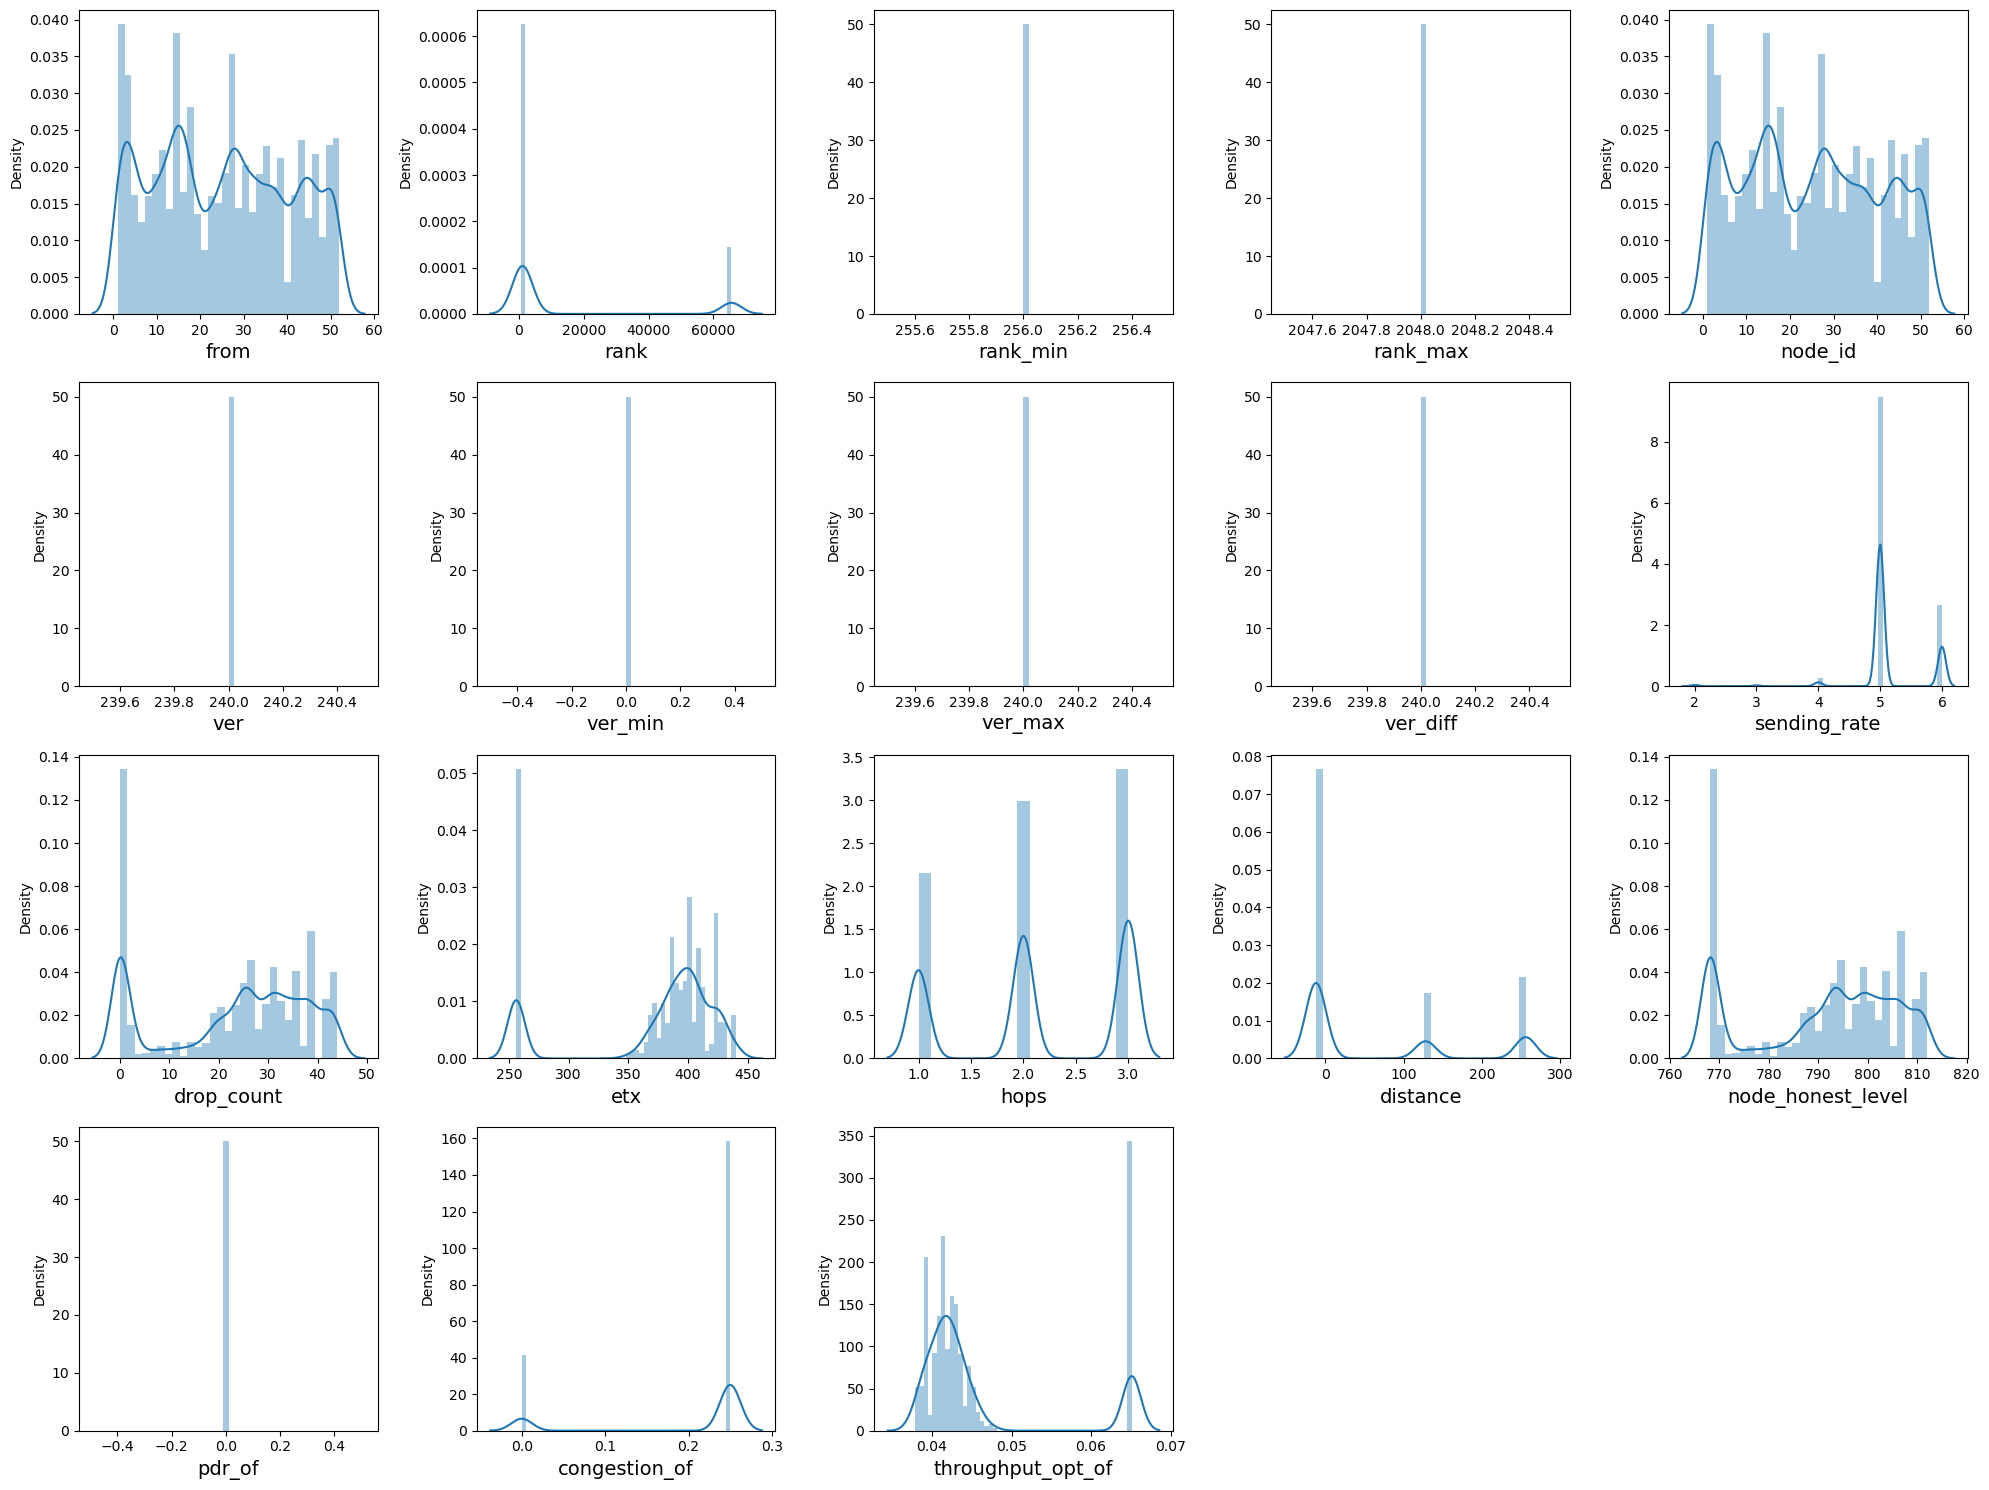

In [31]:
#Univariate Analysis of discrete feature

plt.figure(figsize=(20,15),facecolor='White')
plotnumber = 1

for column in data[discrete_feature]:
    if plotnumber < 36:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
    plotnumber += 1
plt.tight_layout()

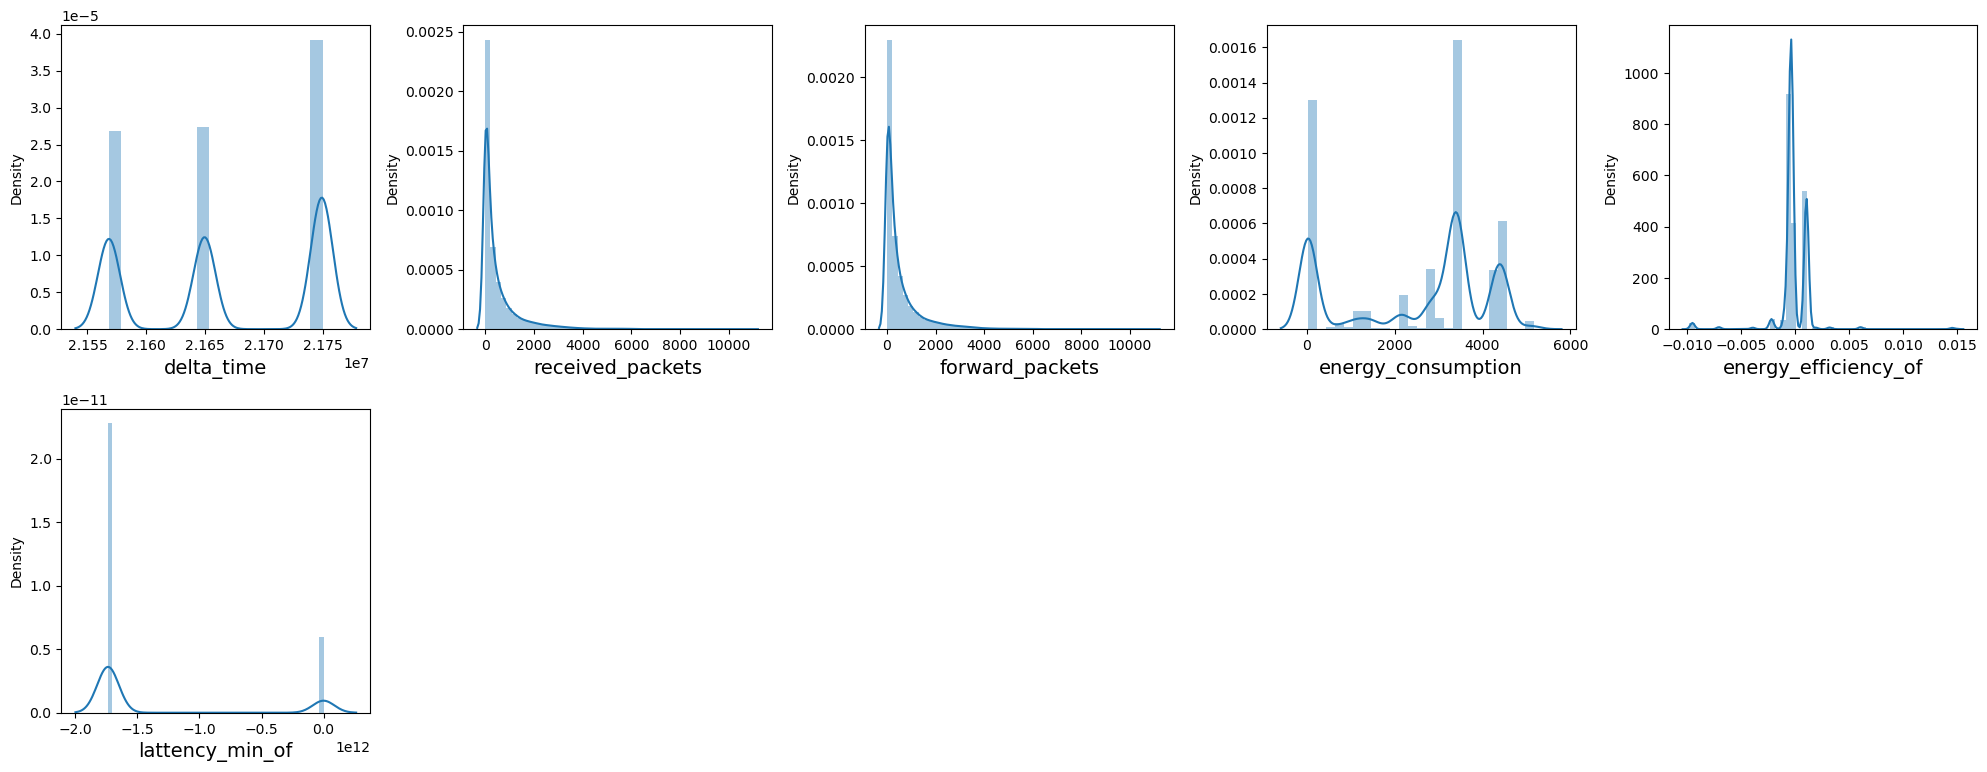

In [32]:
#Univariate Analysis of continous feature

plt.figure(figsize=(20,15),facecolor='White')
plotnumber = 1

for column in data[continous_feature]:
    if plotnumber < 36:
        ax = plt.subplot(4,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
    plotnumber += 1
plt.tight_layout()

In [33]:
data[categorical_feature].head()

,no,time,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,node_type,data
0,2,00:03.044,25,fe80::212:74011101,fe80::212:74033303,fe80::212:74011101,87bb925b-d3ff-46a6-b339-7d48b8993bec,EDGE_NODE,97: 0x41D88ACD ABFFFF01 01010001 7412007A 3B3A...
1,3,00:03.993,20,fe80::212:7420202020,fe80::212:74044404,fe80::212:74000101,bd86a2f6-b3d6-4c67-a9d3-2a42904c243c,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00141414 001...
2,4,00:03.993,0,fe80::212:7424242424,0,0,0233072f-b8cd-4189-818e-2a4e2b8f1ae7,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00181818 001...
3,5,00:03.997,10,fe80::212:7442424242,fe80::212:74044404,fe80::212:74000101,c0a88d50-730f-4c1a-b21e-83c23f59d9b0,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 002A2A2A 002...
4,6,00:03.997,0,fe80::212:7419191919,0,0,3c256cd4-9b1b-43e3-ab9d-a61f12a776ce,CHILD_NODE,102: 0x61DC18CD AB020202 00027412 00131313 001...


In [34]:
import hashlib

def hash_value(value):
    """
    Hashes IPv6 addresses using MD5 and UUIDs using SHA-256.
    Returns a hashed integer in the range (0 to 10**8).
    """
    if pd.isna(value) or value == '0':
        return 0
    elif '::' in value:
        return int(hashlib.md5(value.encode()).hexdigest(),16) % (10*8)
    elif "-" in value:
        return int(hashlib.sha256(value.encode()).hexdigest(),16) % (10*8)
    else:
        return None

In [35]:
columns_to_hash = ['edgenodeaddress', 'sourceaddress', 'destinationaddress', 'instance_id','data']

In [36]:
data[columns_to_hash] = data[columns_to_hash].applymap(hash_value)

In [37]:
data[columns_to_hash]

,edgenodeaddress,sourceaddress,destinationaddress,instance_id,data
0,69,69,58,51,None
1,22,6,30,59,None
2,0,49,0,77,None
3,22,49,30,10,None
4,0,22,0,39,None
...,...,...,...,...,...
33884,22,53,74,78,None
33885,22,2,74,15,None
33886,22,67,74,8,None
33887,22,37,69,73,None


In [38]:
data.sample(3)

,no,time,from,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,rank,rank_min,...,hops,distance,node_type,node_honest_level,energy_efficiency_of,lattency_min_of,pdr_of,congestion_of,throughput_opt_of,data
32873,33672,03:28.648,16,0,16,0,0,15,65535.0,256,...,1,256,CHILD_NODE,768,-0.000417,0,0.01,0.00,0.065104,None
32292,33080,03:23.590,16,38,16,69,22,36,1280.0,256,...,3,-12,CHILD_NODE,806,0.001030,-1737107456494,0.01,0.25,0.041667,None
12907,13364,01:51.773,27,31,2,74,22,24,1280.0,256,...,3,-12,CHILD_NODE,799,0.001030,-1737107355881,0.01,0.25,0.041254,None


In [39]:
data[categorical_feature].head()

,no,time,to,sourceaddress,destinationaddress,edgenodeaddress,instance_id,node_type,data
0,2,00:03.044,25,69,58,69,51,EDGE_NODE,None
1,3,00:03.993,20,6,30,22,59,CHILD_NODE,None
2,4,00:03.993,0,49,0,0,77,CHILD_NODE,None
3,5,00:03.997,10,49,30,22,10,CHILD_NODE,None
4,6,00:03.997,0,22,0,0,39,CHILD_NODE,None


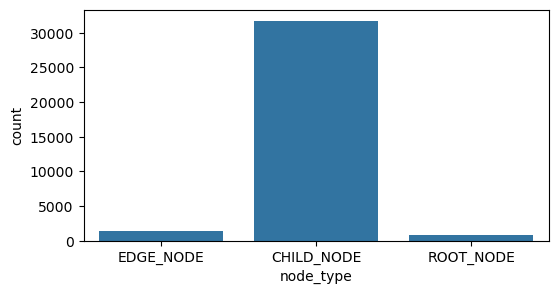

In [40]:
plt.figure(figsize = (6,3))
sns.countplot(data=data, x='node_type')
plt.show()

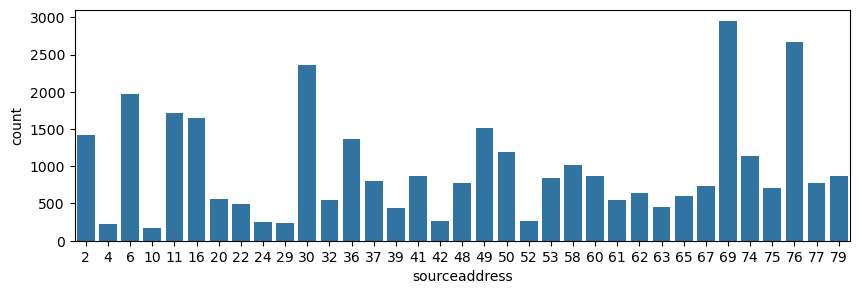

In [41]:
plt.figure(figsize = (10,3))
sns.countplot(data=data, x='sourceaddress')
plt.show()

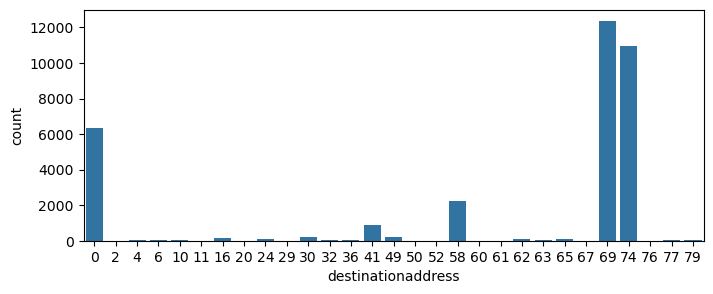

In [42]:
plt.figure(figsize = (8,3))
sns.countplot(data=data, x='destinationaddress')
plt.show()

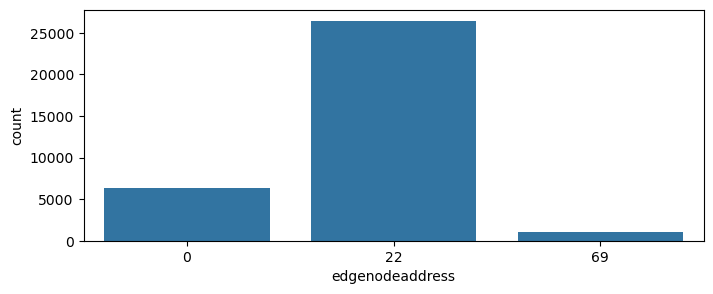

In [43]:
plt.figure(figsize = (8,3))
sns.countplot(data=data, x='edgenodeaddress')
plt.show()

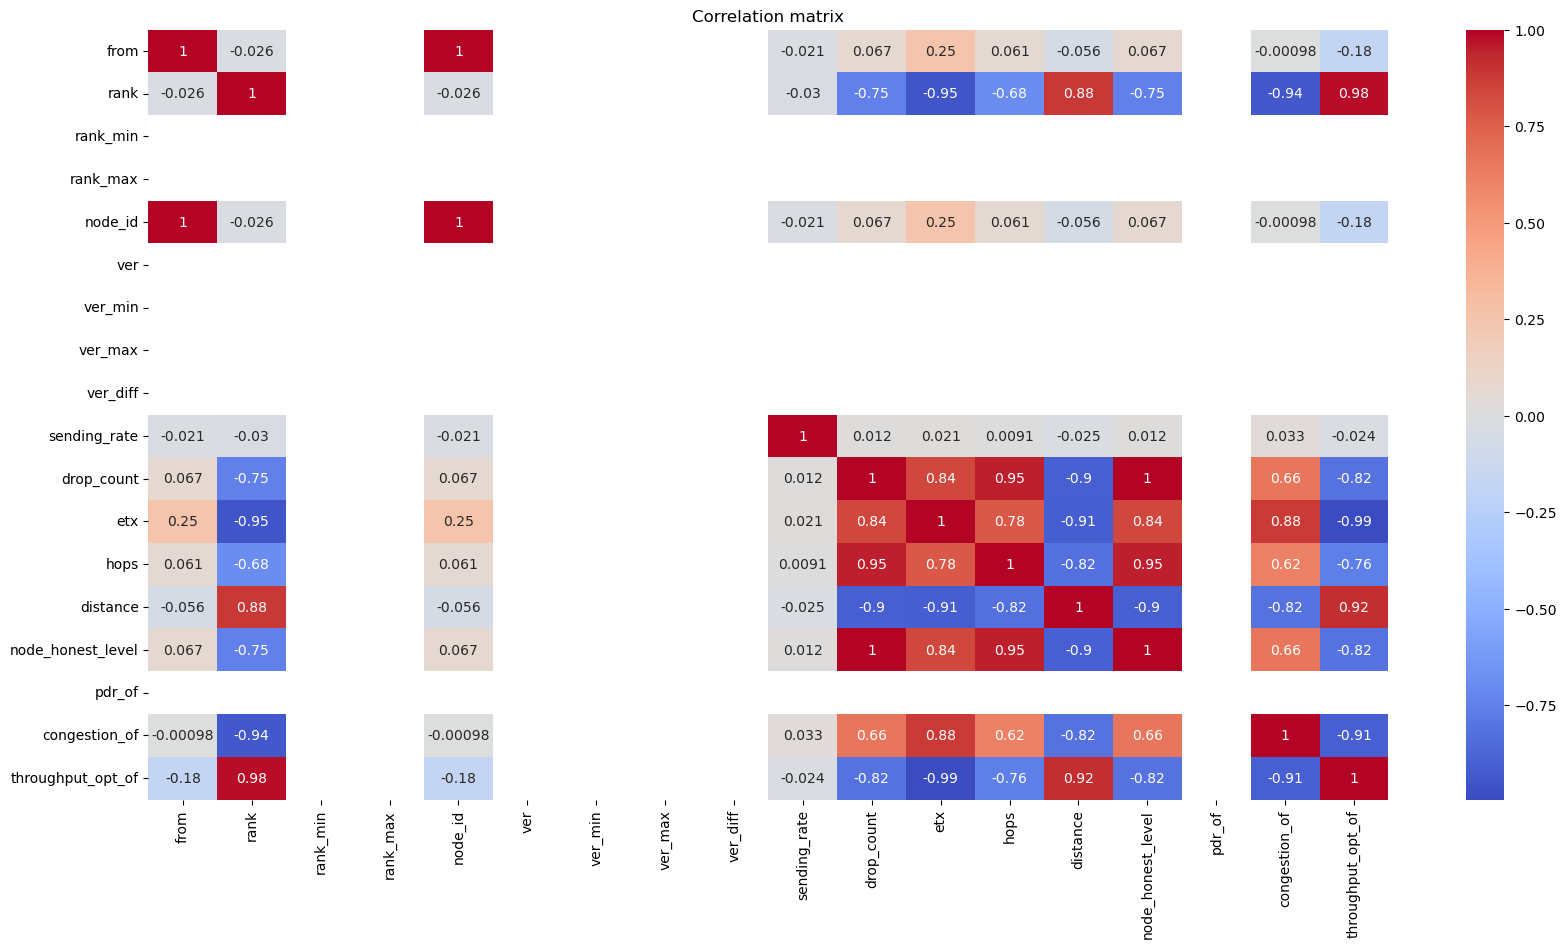

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(data[discrete_feature].corr(),annot=True,cmap = 'coolwarm')
plt.title("Correlation matrix")
plt.show()

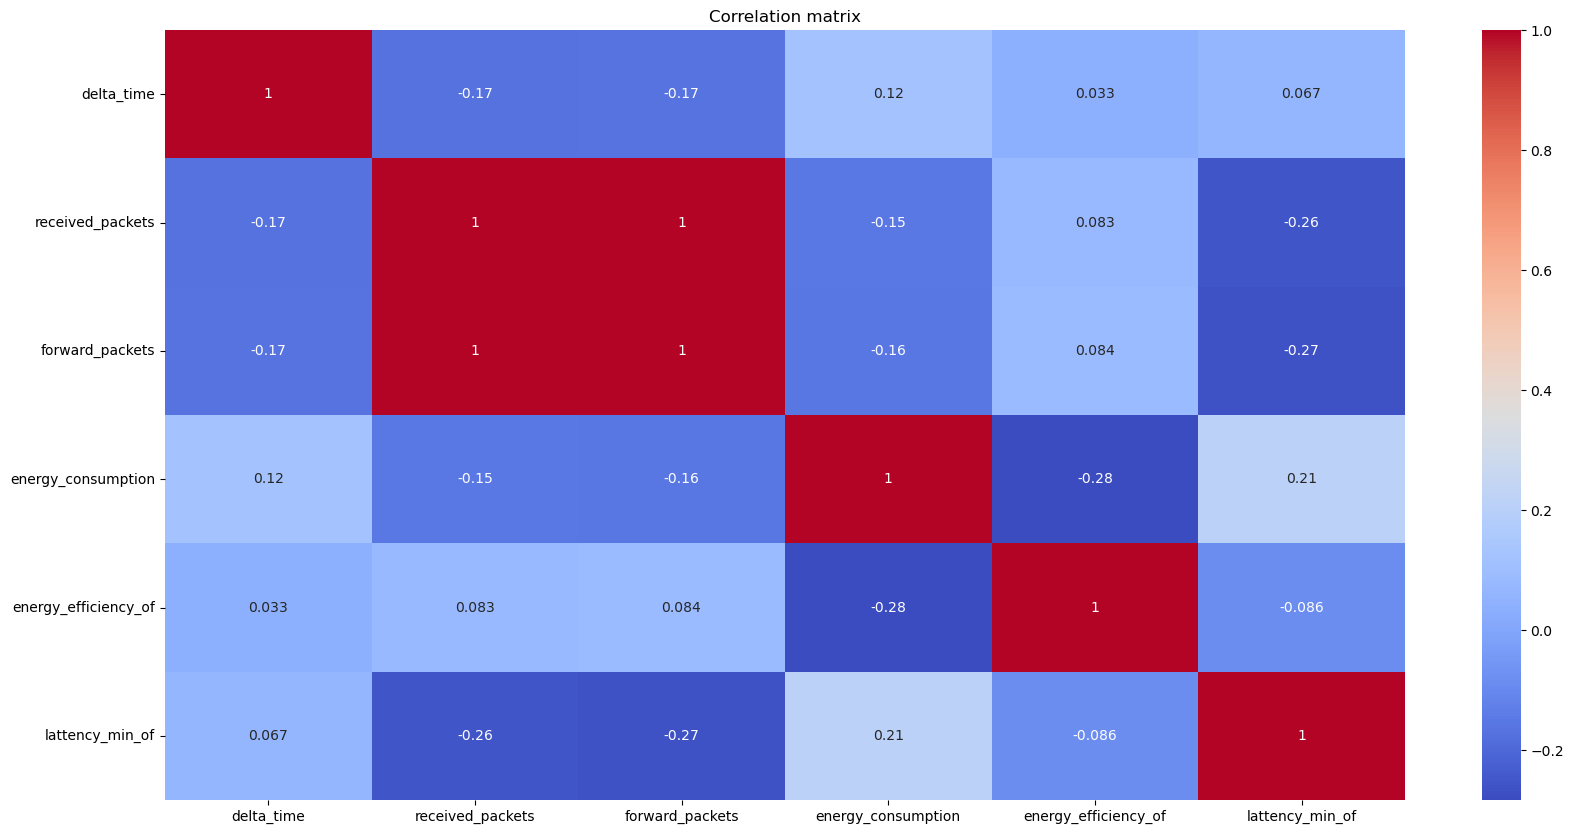

In [45]:
plt.figure(figsize=(20,10))
sns.heatmap(data[continous_feature].corr(),annot=True,cmap = 'coolwarm')
plt.title("Correlation matrix")
plt.show()

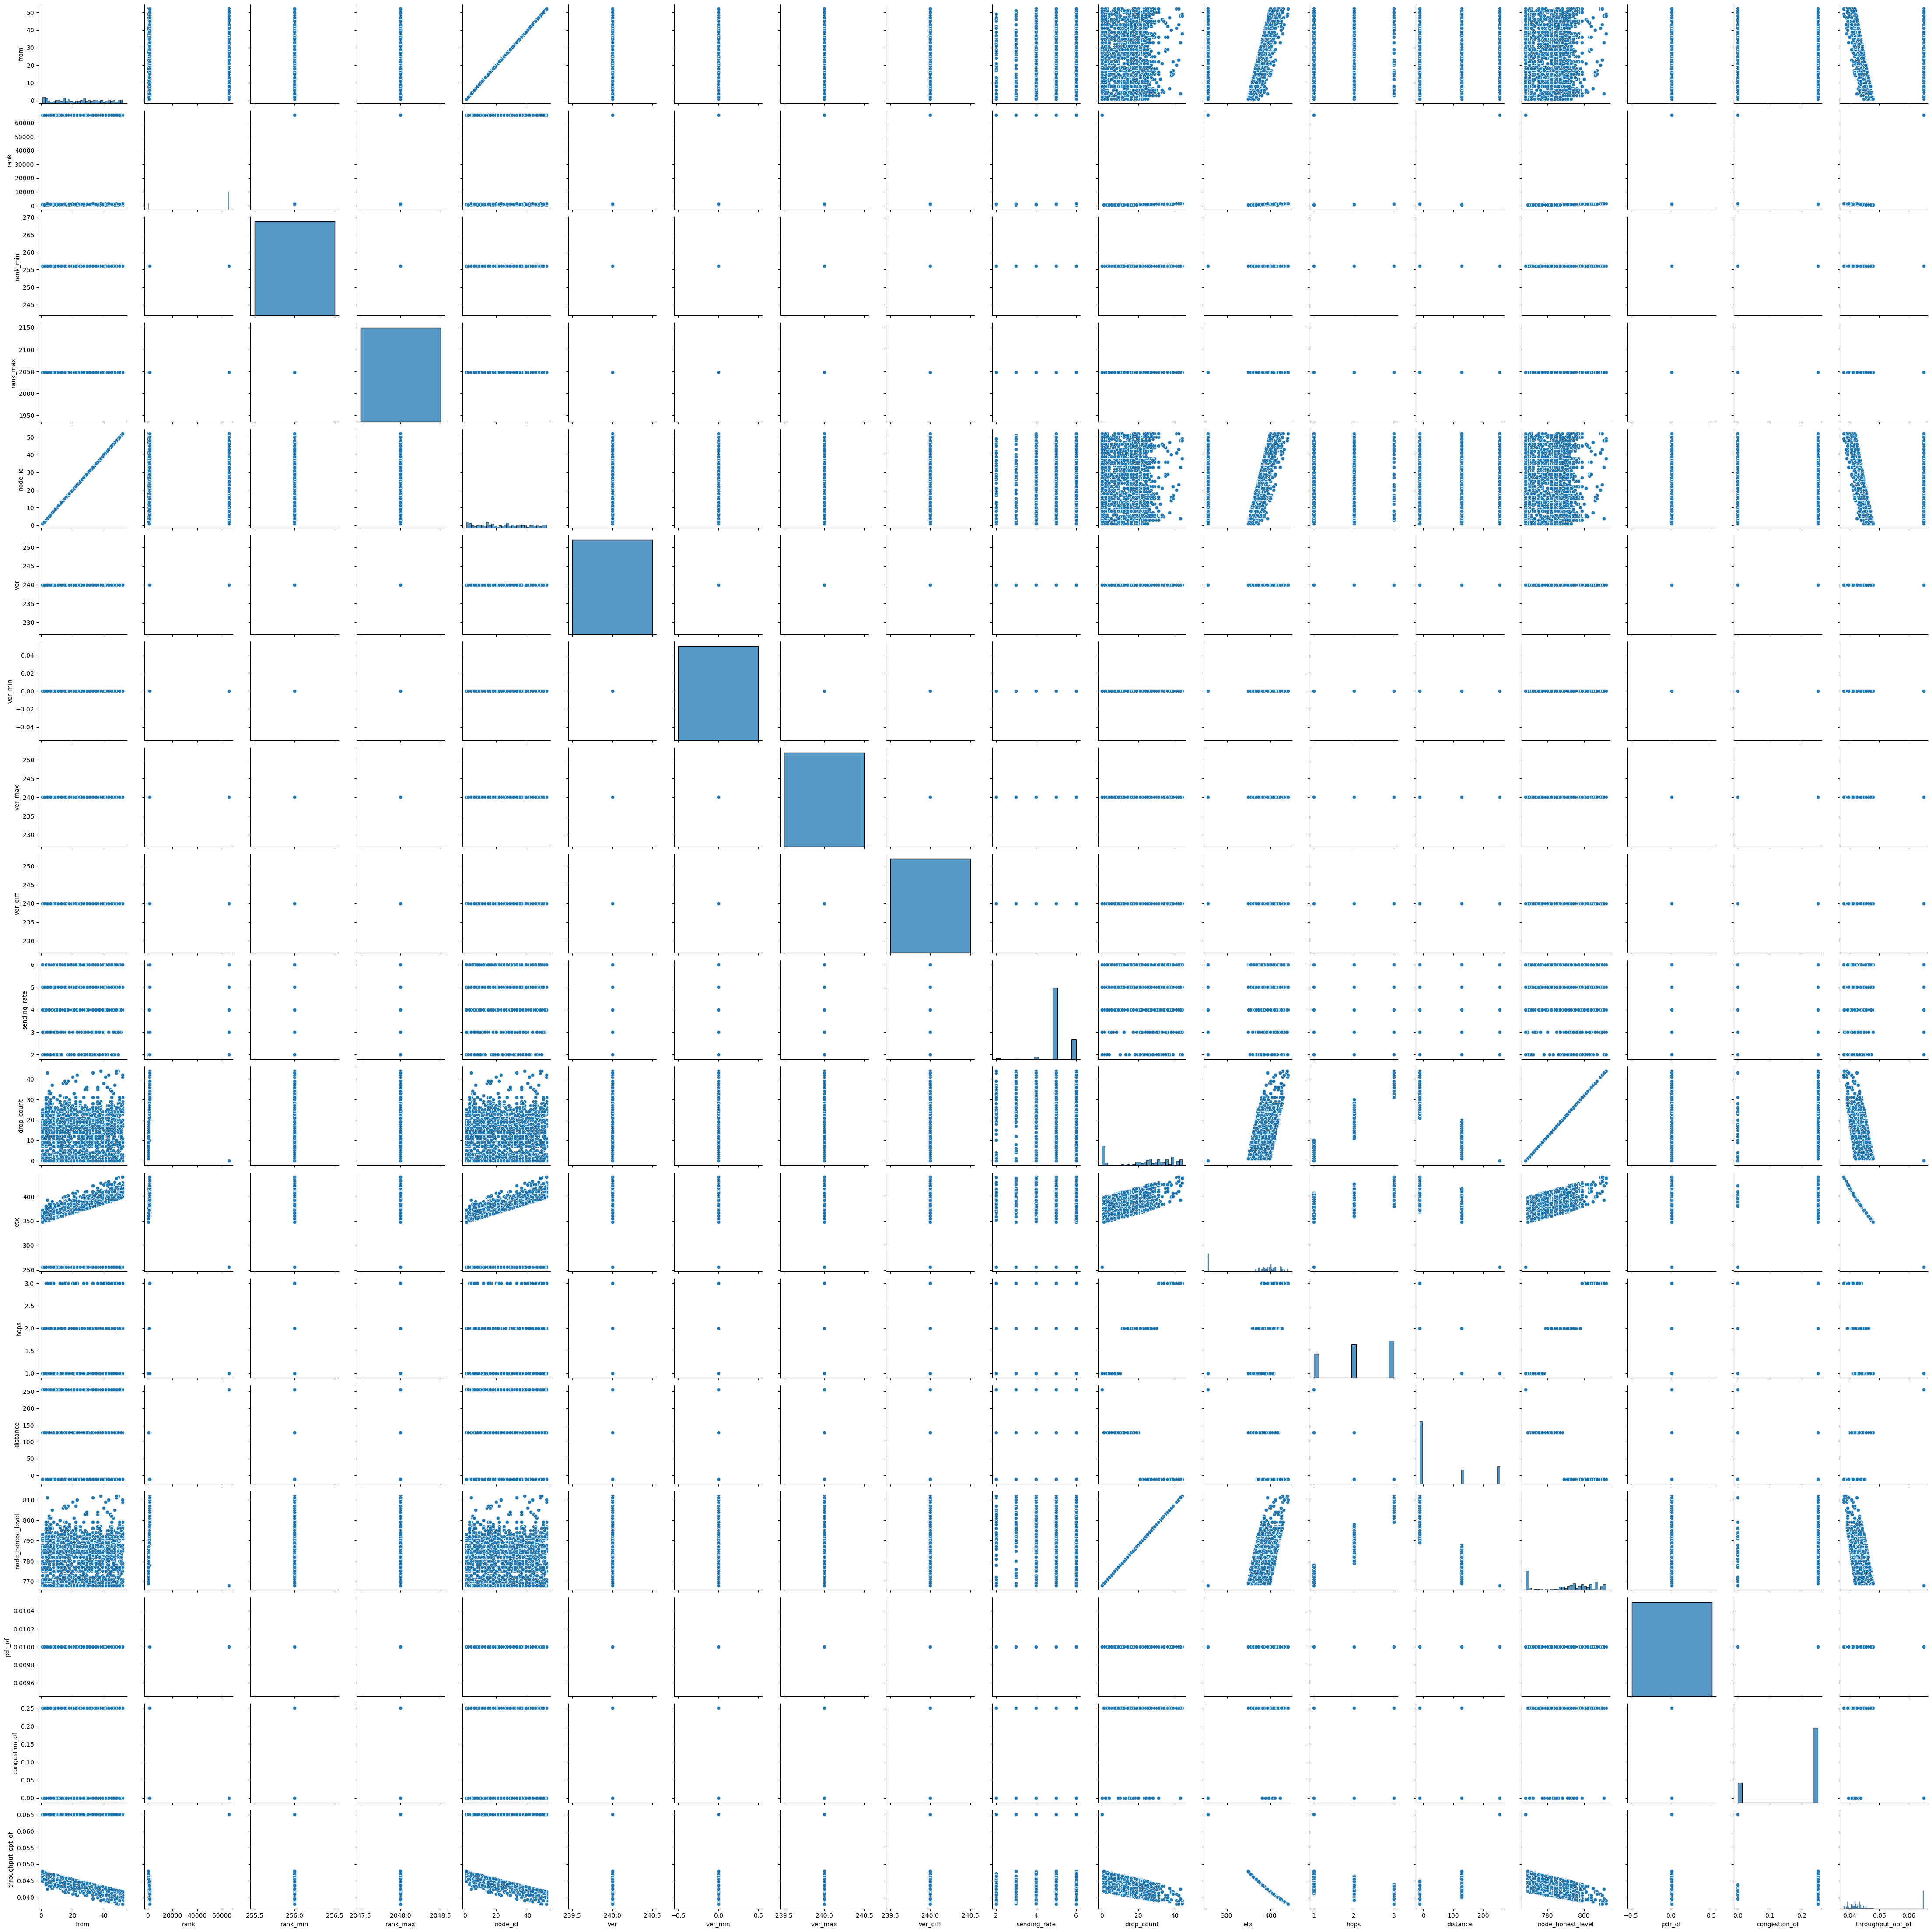

In [46]:
sns.pairplot(data[discrete_feature])

In [ ]:
sns.pairplot(data[continous_feature])